问题：什么特征存活的可能性更大？

1.1、了解数据基本信息与总体情况

In [10]:
import numpy as np
import pandas as pd

# 数据可视化代码
from IPython.display import display
%matplotlib inline

# 加载数据集
in_file = 'titanic_data.csv'
titanic_data = pd.read_csv(in_file)

# 显示数据列表中的前几项乘客数据
display(titanic_data.head())
titanic_data.info()
titanic_data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


数据集中共有12个字段

PassengerId：乘客编号

Survived：乘客是否存活

Pclass：乘客所在的船舱等级

Name：乘客姓名

Sex：乘客性别

Age：乘客年龄

SibSp：乘客的兄弟姐妹和配偶数量

Parch：乘客的父母与子女数量

Ticket：票的编号

Fare：票价

Cabin：座位号

Embarked：乘客登船码头

共有891位乘客的数据信息。其中177位乘客的年龄数据缺失，2位乘客的登船码头数据缺失，687位乘客的船舱数据缺失。


In [11]:
titanic_data.dropna(subset =['Age'],inplace = True)
titanic_data.info()
titanic_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


对年龄缺失的客户进行处理，剩下714位客户数据为样本,该样本占整体的80%，超过总乘客的80%。

1.2分析单变量的分布情况

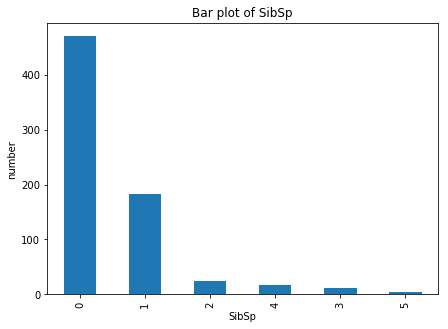

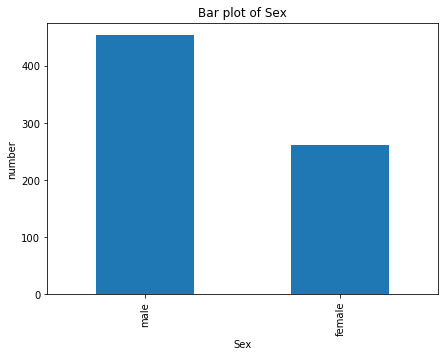

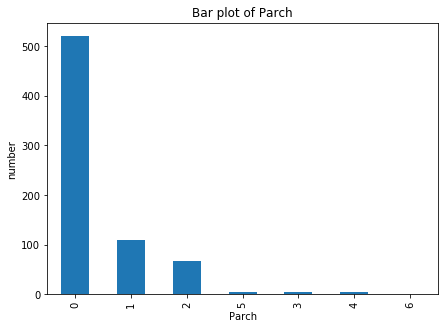

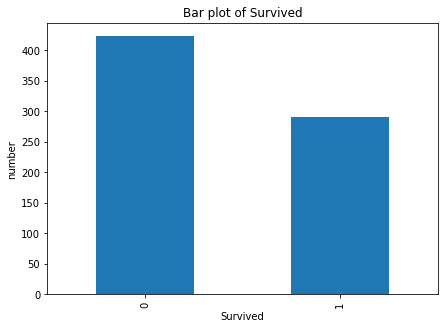

In [12]:
import matplotlib.pyplot as plt
list = ["SibSp","Sex","Parch","Survived"]
for i in list:
    fig,ax = plt.subplots(figsize=(7,5))
    titanic_data[i].value_counts().plot(kind="bar")
    plt.ylabel("number")
    ax.set_title("Bar plot of "+i)
    plt.xlabel(i)
    

SibSp条形分布图发现,大部分乘客在船上没有兄弟姐妹或配偶
Sex条形分布图发现，大部分乘客为男性
Parch条形分布图发现,大部分乘客在船上没有父母或子女，100多位乘客在船上有1个兄弟姐妹或配偶
Survived条形分布图发现，大部分乘客没有获救。

<function matplotlib.pyplot.show>

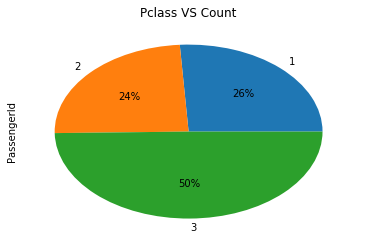

In [13]:
titanic_data.groupby('Pclass')['PassengerId'].count().plot(kind='pie',autopct='%.f%%')
plt.title('Pclass VS Count')
plt.show

Pclass饼图发现，50%乘客位于第三等级，第一等级和第二等级的乘客分别为26%与24%

#### 1.3多变量分析

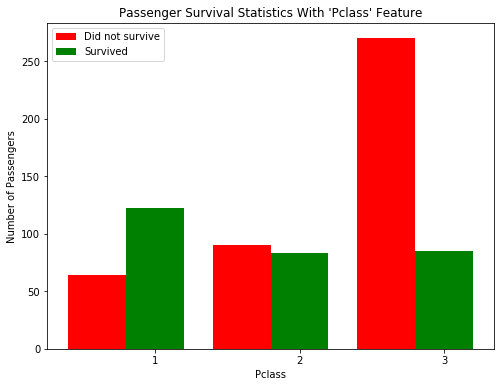

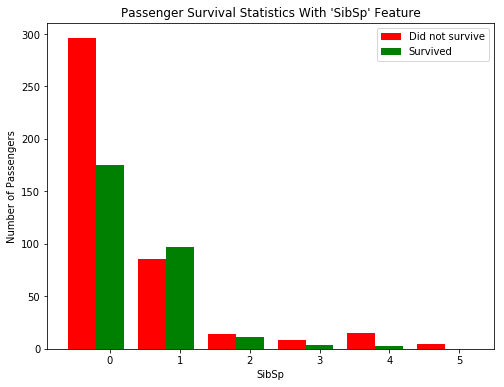

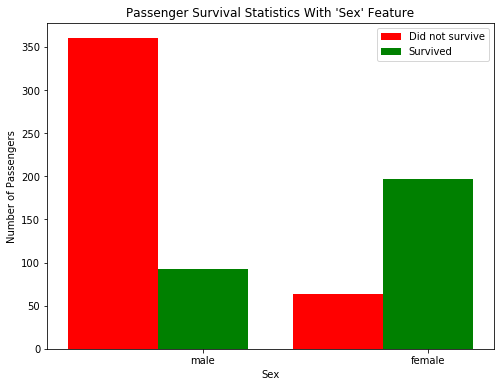

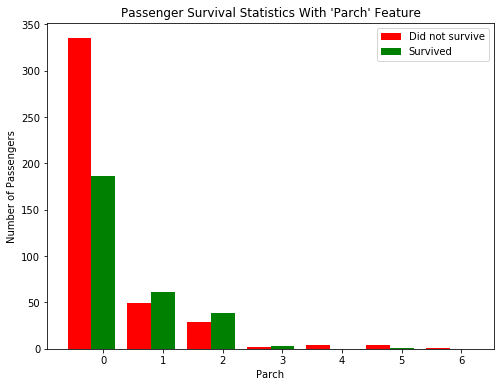

In [14]:
#引用进阶中的代码
from titanic_visualizations import survival_stats 


outcomes =titanic_data['Survived']
data = titanic_data.drop('Survived', axis = 1)

for i in ["Pclass","SibSp","Sex","Parch"]:
    survival_stats(data, outcomes,i)


第一等级的乘客获救概率高于50%，第二等级的乘客获救可能性在50%左右，而第三等级的乘客获救可能性很低。
兄弟姐妹或配偶数量与是否获救，数量为1或2的乘客获救的可能性更高。
女性获救的可能性更高，而男性获救的比例很低。
父母或子女数目和是否获救，有数量为1或2的乘客获救的可能性更高。


结论与预测
我对891位乘客的数据进行统计，发现其年龄、座位号数据分别缺失177与687，缺失比率分别为19.8%，77%。
由于座位缺失超过77%，超过60%。所以不按照座位缺失进行处理。但是年龄缺不到20%，剩下的客户还有80%，超过60%，
根据中心极限定理，如果样本数据足够大且是随机选取，那么分析结果有代表性否则，该分析结果存在偏差。

